<a href="https://colab.research.google.com/github/sadhub10/SIC-2025-Aulas-Pa09-y-Pa10/blob/main/Clase%202%20-%20IA%20-%20Capitulo%207%20-%20Unidad%201%20y%202%20-%2012/11/2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estructura de Clase Minería de Textos y Preprocesamiento**

I. Unidad 1: Minería de Textos y Fundamentos (60 min)

### BLOQUE 1: El "Oro" Escondido - Unidad 1 (60 Minutos)

### 🤚 **DINÁMICA:** "Levanten la mano si hoy usaron...




¿Un traductor (Google Translate, DeepL)?

¿Un autocorrector en su celular?

¿Un chatbot de servicio al cliente?

¿Siri, Alexa o el Asistente de Google?

# *`Felicidades, todos ustedes usaron Procesamiento del Lenguaje Natural (PLN) esta noche. Nuestro objetivo hoy es entender cómo funciona esa magia."`*

### El Problema: Datos No Estructurados (Teoría + Analogía)

# `"El 80% de los datos del mundo son no estructurados . ¿Qué es eso? Son emails, videos, posts en redes sociales, audios, PDFs. Es un caos de información.`

## ¿Qué es la Minería de Textos (TM)?

"La Minería de Textos es el proceso de ser un detective 🕵️‍♂️. Es la tecnología para extraer información útil y patrones de ese caos de texto. El PLN es una rama de la IA que nos da las 'herramientas' (como la lupa y el kit de huellas) para entender el significado de ese texto."

### ⛏️ Analogía Central:
Buscar en un gran depósito de arcilla diamantes. La arcilla es el texto bruto; el proceso de separación y pulido es la Minería de Textos.

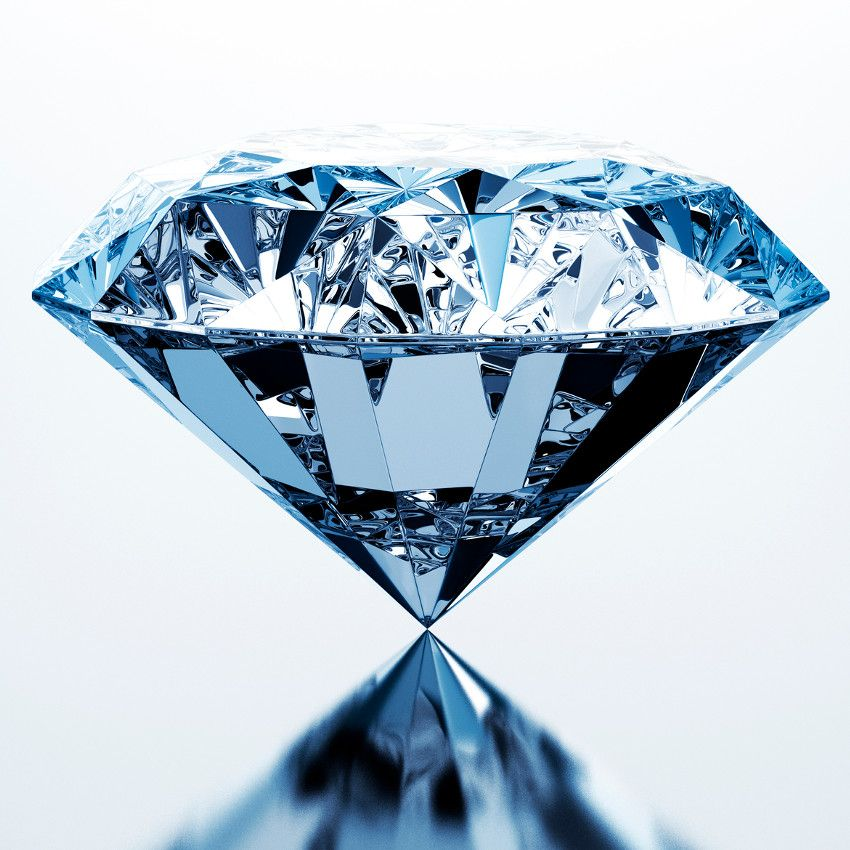

*Profesor: "¡No podemos analizar el texto que no tenemos! El primer paso es recolectarlo. Hay dos formas principales: 'pedir amablemente' o 'ir a buscarlo'.*

### Concepto (Teoría):

* API (Pedir amablemente): Una "llave" que nos dan servicios como Twitter o Google para acceder a sus datos de forma ordenada.

+ Scraping (Ir a buscarlo): Extraer la información directamente del HTML de una página web.

* Rastreo: Seguir enlaces de forma automática para descubrir páginas (como hace Google).

### PRÁCTICA DE CÓDIGO 1: Web Scraping (solicitudes + bs4)

In [ ]:
!pip install requests
!pip install beautifulsoup4

In [ ]:
# Módulos necesarios: requests (descarga) y bs4 (análisis HTML).
import requests
import bs4

print("Descargando página de Wikipedia en español...")

# La URL del artículo en ESPAÑOL.
URL_ESPANOL = "https://es.wikipedia.org/wiki/Aprendizaje_autom%C3%A1tico"

# User-Agent para simular un navegador.
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Ejecutamos la petición GET a la URL en español.
res = requests.get(URL_ESPANOL, headers=headers)

# Creamos el objeto Beautiful Soup.
soup = bs4.BeautifulSoup(res.text, 'html.parser')

# Buscamos TODAS las etiquetas de párrafo '<p>'.
parrafos = soup.find_all('p')

# Inicializamos la cadena de texto.
texto_extraido = ""

# Iteramos para unir el texto de los párrafos.
for p in parrafos:
    texto_extraido += p.text.strip() + "\n"

# Imprimimos el texto extraído.
print("\n--- INICIO DEL TEXTO EXTRAÍDO EN ESPAÑOL (COMPLETO) ---")
print(texto_extraido)

Descargando página de Wikipedia en español...

--- INICIO DEL TEXTO EXTRAÍDO EN ESPAÑOL (COMPLETO) ---
El aprendizaje automático (AA); también llamado automatizado, computacional de máquinas, o maquinal[1]​ (del inglés machine learning, ML), es el subcampo de las ciencias de la computación y una rama de la inteligencia artificial, cuyo objetivo es desarrollar técnicas que permitan que las computadoras aprendan. Se dice que un agente aprende cuando su desempeño mejora con la experiencia y mediante el uso de datos; es decir, cuando la habilidad no estaba presente en su genotipo o rasgos de nacimiento.[2]​ "En el aprendizaje de máquinas un computador observa datos, construye un modelo basado en esos datos y utiliza ese modelo a la vez como una hipótesis acerca del mundo y una pieza de software que puede resolver problemas".[3]​
En muchas ocasiones el campo de actuación del aprendizaje automático se solapa con el de la estadística inferencial, ya que las dos disciplinas se basan en el anál

### El Bisturí Digital - RegEx (Teoría + Código)

* Concepto (Teoría): "Las Expresiones Regulares (RegEx) son nuestro bisturí digital. Son una mini-programación para encontrar patrones de texto".

* ANALOGÍA (Super CTRL+F): "Es como hacer 'Buscar y Reemplazar' (CTRL+F), pero con superpoderes. En lugar de buscar 'hola', puedes buscar 'cualquier palabra que empiece con H y termine con A y tenga 4 letras'."

### "Metacaracteres clave:

* \d= un dígito (0-9)

* \w= un carácter alfanumérico (letra, número o _)

* += 1 o más veces (Ej: \d+= uno o más dígitos)

* *= 0 o más veces

* ?= 0 o 1 vez

* [abc]= un conjunto (a, b, o c)

* ( )= Agrupar (¡muy importante!)"

### PRÁCTICA DE CÓDIGO 3: Encontrando Patrones (investigación)

In [ ]:
import re

texto = "Anna is 15 years old and John is 12 years old."

# \d+ -> uno o más dígitos
# ([0-9]+) -> Agrupa esos dígitos
# \D+ -> uno o más NO dígitos (el " years old and John is ")

# Compilamos la expresión
mi_regex = re.compile(r"([0-9]+)\D+([0-9]+)")

# Buscamos el patrón
m = mi_regex.search(texto)

print("--- Extrayendo Edades con RegEx ---")
print(f"Coincidencia total (Grupo 0): {m.group(0)}")
print(f"Primera edad (Persona 1): {m.group(1)}") # '15'
print(f"Segunda edad (Persona 2): {m.group(2)}") # '12'

--- Extrayendo Edades con RegEx ---
Coincidencia total (Grupo 0): 15 years old and John is 12
Primera edad (Persona 1): 15
Segunda edad (Persona 2): 12


### PRÁCTICA DE CÓDIGO 4: Ocultando Información (re.sub)

In [ ]:
# Ahora vamos a ocultar un número de teléfono
texto_telefono = "El número de soporte es 800-123-4567, llame ya."

# (\d{3}) -> Grupo 1: 3 dígitos
# (\d{3}) -> Grupo 2: 3 dígitos
# (\d{4}) -> Grupo 3: 4 dígitos

# \g<1> y \g<2> se refieren a los grupos 1 y 2
texto_oculto = re.sub(r"(\d{3})-(\d{3})-(\d{4})",
                      r"\g<1>-\g<2>-****",
                      texto_telefono)

print("\n--- Ocultando Teléfono con RegEx ---")
print(f"Original: {texto_telefono}")
print(f"Oculto: {texto_oculto}")
# Salida: El número de soporte es 800-123-****, llame ya.


--- Ocultando Teléfono con RegEx ---
Original: El número de soporte es 800-123-4567, llame ya.
Oculto: El número de soporte es 800-123-****, llame ya.


# **¡DESCANSO! (10 minutos)**

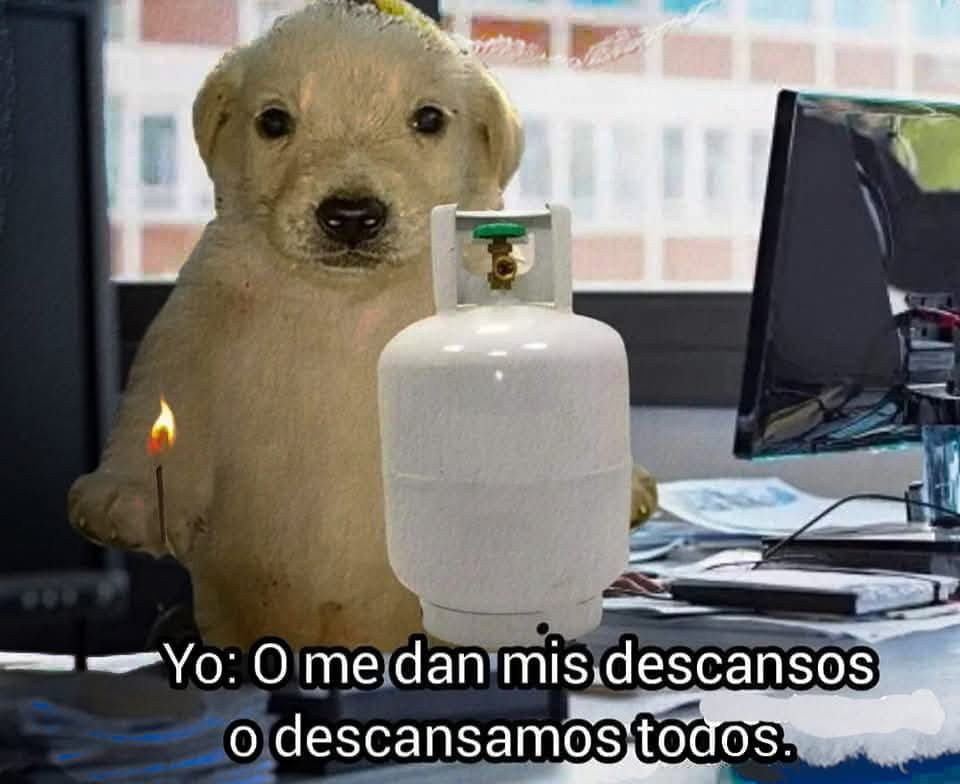

### BLOQUE 2: La "Cocina" del PLN - Unidad 2 (50 Minutos)

### Tokenización y Stopwords

### ANALOGÍA (La Papa):
"El preprocesamiento es como cocinar una papa. No la metes al horno con tierra. Tienes que: 1. Tokenizar (cortarla), 2. Limpiar Stopwords (quitarle la piel), 3. Normalizar (hervirla)".

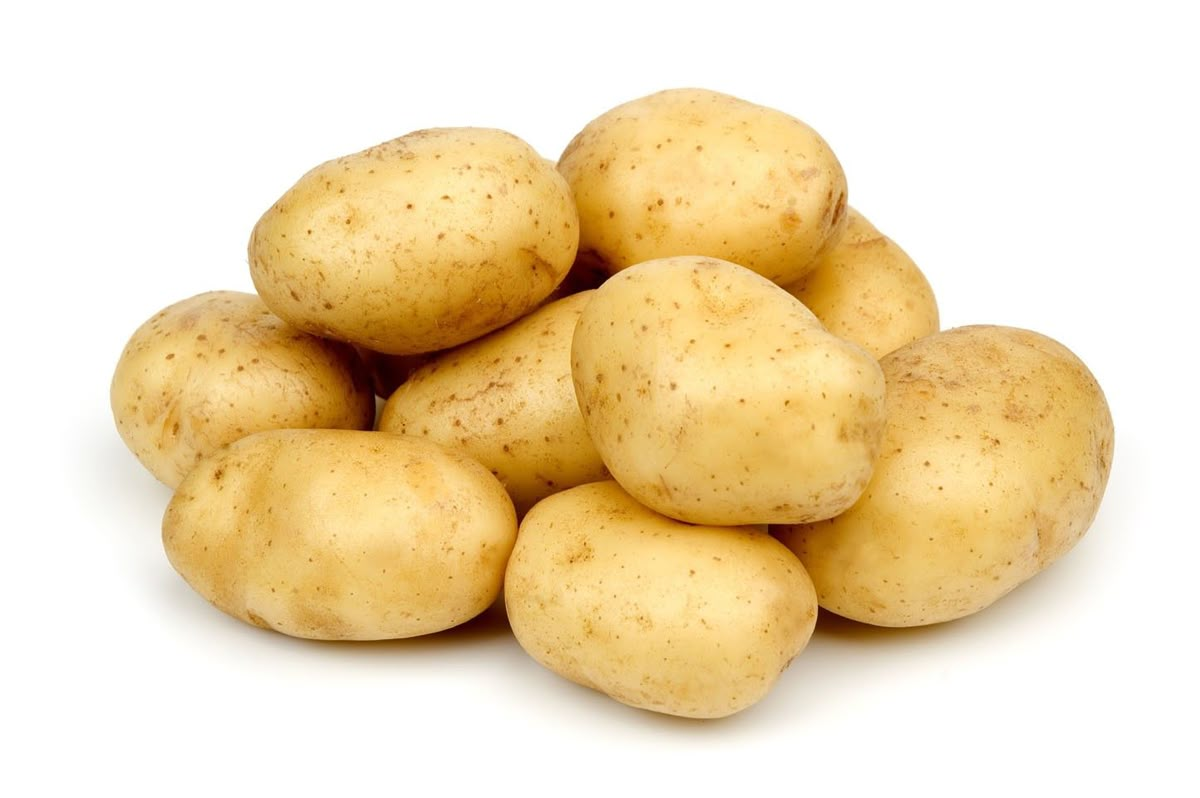

### Concepto (Teoría):

1. Tokenización: El proceso de "cortar" el texto. Dividirlo en frases o, más comunes, en palabras (tokens). Maneja casos difíciles como "Don't" (→ "Do", "n't") o "Mr. Jone's" (→ "Mr.", "Jone", "'s").

2. Stopwords (Palabras Vacías): Palabras comunes que no añaden significado (el, la, un, y, o, pero, de, con...). Son "ruido" 🧹 y usualmente las eliminamos.

PRÁCTICA DE CÓDIGO 5: Tokenizar y Limpiar Stopwords (NLTK)

In [ ]:
import nltk
# NLTK requiere descargar estos paquetes la primera vez
# nltk.download('punkt')  # Paquete para tokenizar (descomentar si es necesario)
# nltk.download('stopwords') # Lista de palabras vacías (descomentar si es necesario)
# nltk.download('punkt_tab') # Descargar 'punkt_tab' explícitamente (descomentar si es necesario)

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Definimos el texto de ejemplo a procesar
ejemplo = "Family is not an important thing. It's everything."

# --- Configuración y Preparación ---
# 1. Obtenemos el conjunto de palabras vacías (stopwords) en inglés.
# Usamos 'set' para una búsqueda más rápida.
palabras_vacias = set(stopwords.words('english'))
# print(palabras_vacias) # Puedes descomentar para ver la lista de palabras vacías

# 2. Tokenizamos la frase: dividimos el texto en palabras o tokens individuales.
tokens_palabra = word_tokenize(ejemplo)

print(f"\n--- Tokenización y Stopwords ---")
print(f"Tokens Originales: {tokens_palabra}")

# --- Proceso de Filtrado (Limpieza) ---
# 3. Filtramos los tokens para eliminar las palabras vacías y la puntuación.
resultado = []
for p in tokens_palabra:
    p_minuscula = p.lower() # Convertimos el token a minúsculas para una comparación uniforme.

    # Verificamos dos condiciones:
    # a) Que la palabra NO sea una stopword (ej: 'is', 'not', 'an').
    # b) Que sea alfabética (ignora la puntuación como '.', ',', etc.).
    if p_minuscula not in palabras_vacias and p_minuscula.isalpha():
        resultado.append(p_minuscula)

print(f"Tokens Limpios: {resultado}")
# La salida será: ['family', 'important', 'thing', 'everything']
# Notarás que 'is', 'not', 'an', y la puntuación ('.') han desaparecido.


--- Tokenización y Stopwords ---
Tokens Originales: ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
Tokens Limpios: ['family', 'important', 'thing', 'everything']


## Normalización

# `*"Siguiente paso en la cocina. Tenemos 'corriendo', 'corre', 'corrió'. Para la máquina, son 3 palabras distintas, pero el significado es el mismo: 'correr'. Necesitamos unificarlas."*`

### Concepto (Teoría):

* Derivación (Tallo): Es rápido y "bruto". Corta la palabra algorítmicamente. (Ej: 'estudios' → 'studi'). No siempre produzca una palabra real.

* Lematización (Lema): Es "inteligente". Usa un diccionario para encontrar la raíz lingüística real (el lema). (Ej: 'estudios' → 'estudio'). Es más lento pero más preciso.

ANALOGÍA (Hacha vs. Bisturí): "El Stemming es un hacha 🪓: corta rápido y feo. La Lematización es un bisturí 🔪: es preciso y usa conocimiento (un diccionario)".

RÁCTICA DE CÓDIGO 6: Derivación vs Lematización (NLTK)

In [ ]:
import nltk
# Descargamos 'wordnet', el diccionario necesario para la lematización, si no está disponible.
# nltk.download('wordnet') # Descomentar si es necesario

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Lista de palabras de ejemplo con diferentes flexiones
palabras = ['policy', 'doing', 'organization', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

# ----------------------------------------------------
## 🔪 Stemming (El 'Hacha' o Tallo)
# ----------------------------------------------------

print("\n--- Stemming (El Hacha - Reducción a la Raíz) ---")

# Inicializamos el stemmer de Porter
stemmer = PorterStemmer()

# Aplicamos stemming a cada palabra en la lista
palabras_stemmed = [stemmer.stem(p) for p in palabras]
print(palabras_stemmed)

# Comentarios sobre el resultado del Stemming:
# El stemming corta los sufijos de forma agresiva para reducir la palabra a su "tallo".
# Ej: 'polici' y 'organ' son raíces válidas para el algoritmo, pero no son palabras reales en inglés.

# ----------------------------------------------------
## 🧠 Lematización (El 'Bisturí' o Raíz Lógica)
# ----------------------------------------------------

print("\n--- Lematización (El Bisturí - Búsqueda en Diccionario) ---")

# Inicializamos el lematizador
lematizador = WordNetLemmatizer()

# La lematización busca la forma base real de la palabra (el 'lema')
# y para hacerlo correctamente, NECESITA CONTEXTO (Parte del Discurso o POS)

# 'v' = Verbo (Verbal Part of Speech)
print("--- Lematización como Verbo ('v') ---")
print(f"'dies' (verbo) -> {lematizador.lemmatize('dies', 'v')}")      # 'die' (muere -> morir)
print(f"'watched' (verbo) -> {lematizador.lemmatize('watched', 'v')}") # 'watch' (miró -> mirar)
print(f"'has' (verbo) -> {lematizador.lemmatize('has', 'v')}")         # 'have' (tiene -> tener)
print(f"'lives' (verbo) -> {lematizador.lemmatize('lives', 'v')}")     # 'live' (vive -> vivir)

print("\n--- Lematización por defecto (Asume Sustantivo) ---")
# Si NO le damos el contexto (POS), el lematizador asume por defecto que es un sustantivo ('n')
print(f"'lives' (sustantivo por defecto) -> {lematizador.lemmatize('lives')}") # 'life' (vidas -> vida)


--- Stemming (El Hacha - Reducción a la Raíz) ---
['polici', 'do', 'organ', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']

--- Lematización (El Bisturí - Búsqueda en Diccionario) ---
--- Lematización como Verbo ('v') ---
'dies' (verbo) -> die
'watched' (verbo) -> watch
'has' (verbo) -> have
'lives' (verbo) -> live

--- Lematización por defecto (Asume Sustantivo) ---
'lives' (sustantivo por defecto) -> life


*Nota: Aunque el código esté en español, las funciones como PorterStemmer()y WordNetLemmatizer()de NLTK están diseñadas exclusivamente para procesar el idioma inglés (o el idioma para el que se hayan entrenado los datos). Por eso, las palabras dentro de las listas y funciones ( 'watched', 'dies') deben permanecer en inglés.*

## Final de El Paso - ¡Codificación! 🤖

# `*"¡Ya casi! Tenemos la papa cortada, pelada y hervida. Pero la IA no come papas. La IA solo come NÚMEROS ".*`

### Concepto (Teoría):

"Debemos convertir nuestras palabras limpias en vectores numéricos.

1. Codificación de enteros: Asignar un ID único a cada palabra. (Ej: 'barbero': 1, 'secreto': 2, 'enorme': 3).

2. Padding (Relleno): Asegurarse de que todas las frases tengan la misma longitud (mismo número de tokens), rellenando con ceros.

3. Codificación One-Hot: Convierta esos ID en vectores binarios. Es más descriptivo, pero crea matrices gigantes."

### ANALOGÍA (El Menú):

Codificación entera: 'gato' es el plato #1, 'perro' es el #2.

Codificación One-Hot: Si el menú tiene 3 platos, 'gato' es [1, 0, 0], 'perro' es [0, 1, 0]y 'pez' es [0, 0, 1].

PRÁCTICA DE CÓDIGO 7, 8 y 9: Codificación y Padding (Keras)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.utils import to_categorical

# Texto de ejemplo: una lista de frases (ya pre-procesadas y tokenizadas).
# Cada sub-lista es una frase.
frases = [
    ['barber', 'person'],
    ['barber', 'good', 'person'],
    ['barber', 'huge', 'person'],
    ['knew', 'secret'],
    ['secret', 'kept', 'huge', 'secret'],
    ['barber', 'kept', 'word']
]

# Para TextVectorization, las frases deben ser una lista de cadenas de texto.
frases_procesadas = [" ".join(f) for f in frases]

print("\n--- Codificación de Texto para Redes Neuronales (Keras con TextVectorization) ---")

# --- PASO 1, 2 y 3: Aprender el Vocabulario, Convertir a Secuencias de Enteros y Aplicar Padding (TextVectorization) ---
# 1. Determinamos la longitud máxima deseada para las secuencias.
longitud_maxima = 4

# 2. Creamos la capa TextVectorization.
#    - `max_tokens=None`: Aprenderá todo el vocabulario único en los datos.
#    - `output_mode='int'`: La salida será una secuencia de enteros (índices de palabras).
#    - `output_sequence_length=longitud_maxima`: Las secuencias se rellenarán/truncarán automáticamente
#      a esta longitud. El relleno se hará con ceros al final (`padding='post'`).
#    - `standardize='lower_and_strip_punctuation'`: Convierte a minúsculas y elimina signos de puntuación.
#    - `split='whitespace'`: Divide el texto en palabras por espacios.
vectorizer = TextVectorization(
    max_tokens=None,
    output_mode='int',
    output_sequence_length=longitud_maxima,
    standardize='lower_and_strip_punctuation',
    split='whitespace'
)

# 3. Le "enseñamos" el vocabulario a partir de las frases procesadas.
vectorizer.adapt(tf.constant(frases_procesadas))

# Obtenemos el vocabulario aprendido.
# El vocabulario de TextVectorization incluye un token vacío ('') en el índice 0
# y un token '[UNK]' (desconocido) en el índice 1, seguido por las palabras reales.
vocabulario = vectorizer.get_vocabulary()
print("Vocabulario Aprendido (TextVectorization, primeros 10):")
print(vocabulario[:10]) # Mostrar los primeros 10 elementos del vocabulario

# Creamos un diccionario para visualizar mejor los índices de palabras
vocab_dict = {word: idx for idx, word in enumerate(vocabulario)}
print("Ejemplo de mapeo de palabras a índices:")
print({k: vocab_dict[k] for k in list(vocab_dict)[:8] if k not in ['', '[UNK]']})

# 4. Transformamos las frases de palabras a secuencias numéricas ya rellenadas.
secuencias_rellenas = vectorizer(tf.constant(frases_procesadas))
print("\nSecuencias de Enteros Rellenas (Padded) a longitud 4:")
print(secuencias_rellenas.numpy()) # Convertimos a numpy para una visualización más limpia

# --- PASO 4: Codificación One-Hot (Opcional) ---
# El número de clases para la codificación one-hot es el tamaño total del vocabulario
# (incluyendo '', '[UNK]' y todas las palabras aprendidas).
num_clases_one_hot = len(vocabulario)
codificacion_one_hot = to_categorical(secuencias_rellenas, num_classes=num_clases_one_hot)

print("\nForma (Shape) de la Codificación One-Hot:")
print(codificacion_one_hot.shape)
# La forma final es: (Número de frases, Longitud de la frase, Tamaño del vocabulario completo)
# En este caso: (6 frases, 4 de longitud, 10 clases/tokens únicos incluyendo '', '[UNK]')



--- Codificación de Texto para Redes Neuronales (Keras con TextVectorization) ---
Vocabulario Aprendido (TextVectorization, primeros 10):
['', '[UNK]', np.str_('barber'), np.str_('secret'), np.str_('person'), np.str_('kept'), np.str_('huge'), np.str_('word'), np.str_('knew'), np.str_('good')]
Ejemplo de mapeo de palabras a índices:
{np.str_('barber'): 2, np.str_('secret'): 3, np.str_('person'): 4, np.str_('kept'): 5, np.str_('huge'): 6, np.str_('word'): 7}

Secuencias de Enteros Rellenas (Padded) a longitud 4:
[[2 4 0 0]
 [2 9 4 0]
 [2 6 4 0]
 [8 3 0 0]
 [3 5 6 3]
 [2 5 7 0]]

Forma (Shape) de la Codificación One-Hot:
(6, 4, 10)


# **FIN**

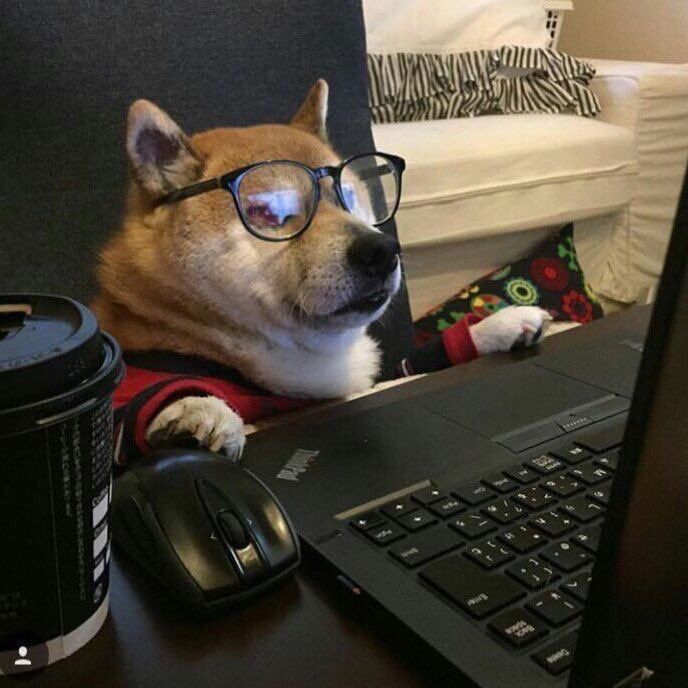